In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

#files to load in for dfs
geopolitics_file = "Resources/2016_US_County_Level_Presidential_Results.csv"
file = 'Resources/us-states.csv'
keyfile = 'Resources/stateabbreviationkey.csv'
# read the csv
#reads covid data by state into dataframe
df = pd.read_csv(file, encoding="ISO-8859-1")
#reads state name and abbreviation key into dataframe
key_df = pd.read_csv(keyfile, encoding="ISO-8859-1")
#renames sloppy state column title for merging
key_df.rename(columns = {'ï»¿"State"':'state'}, inplace = True)
#renames code to state abbrv
key_df.rename(columns = {'Code':'state abv.'}, inplace = True)
#merges abbreviation key into main state dataframe
states_df = pd.merge(df, key_df, how="left", on=["state", "state"])
#renames full-name 'state' column for clarity
states_df.rename(columns = {'state':'State Name'}, inplace = True)
#drop unneccessary state abbreviation column
states_df.drop(states_df.columns[5], axis=1)
#creates politics dataframe
geopolitics_df = pd.read_csv(geopolitics_file)

In [2]:
#cleans politics df by removing irrelevant columns
geopolitics_df.drop(["per_dem", "per_gop", "diff"], inplace=True, axis=1)
geopolitics_df.drop(["per_point_diff", "combined_fips"], inplace=True, axis=1)

In [3]:
#new dataframe with removed repeat values
geopolitics_df_duplicates_removed = pd.DataFrame.drop_duplicates(geopolitics_df)
clean_politics_2016_df = pd.DataFrame(geopolitics_df_duplicates_removed)
clean_politics_2016_df

,Unnamed: 0,votes_dem,votes_gop,total_votes,state_abbr,county_name
0,0,93003.0,130413.0,246588.0,AK,Alaska
1,1,93003.0,130413.0,246588.0,AK,Alaska
2,2,93003.0,130413.0,246588.0,AK,Alaska
3,3,93003.0,130413.0,246588.0,AK,Alaska
4,4,93003.0,130413.0,246588.0,AK,Alaska
...,...,...,...,...,...,...
3136,3136,3233.0,12153.0,16661.0,WY,Sweetwater County
3137,3137,7313.0,3920.0,12176.0,WY,Teton County
3138,3138,1202.0,6154.0,8053.0,WY,Uinta County
3139,3139,532.0,2911.0,3715.0,WY,Washakie County


In [4]:
clean_politics_2016_df["poli_pref"] = (clean_politics_2016_df["votes_dem"]/clean_politics_2016_df["votes_gop"]).round(2)

In [5]:
clean_politics_2016_df.tail()

,Unnamed: 0,votes_dem,votes_gop,total_votes,state_abbr,county_name,poli_pref
3136,3136,3233.0,12153.0,16661.0,WY,Sweetwater County,0.27
3137,3137,7313.0,3920.0,12176.0,WY,Teton County,1.87
3138,3138,1202.0,6154.0,8053.0,WY,Uinta County,0.20
3139,3139,532.0,2911.0,3715.0,WY,Washakie County,0.18
3140,3140,294.0,2898.0,3334.0,WY,Weston County,0.10


In [6]:
sum(clean_politics_2016_df["poli_pref"])

2084.3499999999985

In [7]:
clean_politics_2016_df.sort_values(["poli_pref"], ascending=False)

,Unnamed: 0,votes_dem,votes_gop,total_votes,state_abbr,county_name,poli_pref
316,316,260223.0,11553.0,280272.0,DC,District of Columbia,22.52
1206,1206,313627.0,29290.0,351091.0,MD,Prince George's County,10.71
2411,2411,2504.0,241.0,2896.0,SD,Oglala County,10.39
1982,1982,318403.0,34424.0,358857.0,NY,Bronx County,9.25
223,223,312443.0,34493.0,365295.0,CA,San Francisco County,9.06
...,...,...,...,...,...,...,...
1613,1613,34.0,653.0,715.0,MT,Garfield County,0.05
1843,1843,20.0,367.0,394.0,NE,Grant County,0.05
1809,1809,18.0,355.0,390.0,NE,Banner County,0.05
2718,2718,20.0,524.0,550.0,TX,Roberts County,0.04


In [153]:
clean_politics_2016_df.groupby(clean_politics_2016_df["state_abbr"])

In [8]:
clean_politics_2016_df.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,state_abbr,county_name,poli_pref
0,0,93003.0,130413.0,246588.0,AK,Alaska,0.71
1,1,93003.0,130413.0,246588.0,AK,Alaska,0.71
2,2,93003.0,130413.0,246588.0,AK,Alaska,0.71
3,3,93003.0,130413.0,246588.0,AK,Alaska,0.71
4,4,93003.0,130413.0,246588.0,AK,Alaska,0.71


In [9]:
county_vote_2016_df = clean_politics_2016_df.set_index(["state_abbr"])

In [10]:
county_vote_2016_df.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,county_name,poli_pref
state_abbr,,,,,,
AK,0,93003.0,130413.0,246588.0,Alaska,0.71
AK,1,93003.0,130413.0,246588.0,Alaska,0.71
AK,2,93003.0,130413.0,246588.0,Alaska,0.71
AK,3,93003.0,130413.0,246588.0,Alaska,0.71
AK,4,93003.0,130413.0,246588.0,Alaska,0.71


In [11]:
county_politics_2016_df = pd.DataFrame.drop_duplicates(county_vote_2016_df)

In [12]:
county_politics_2016_df.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,county_name,poli_pref
state_abbr,,,,,,
AK,0,93003.0,130413.0,246588.0,Alaska,0.71
AK,1,93003.0,130413.0,246588.0,Alaska,0.71
AK,2,93003.0,130413.0,246588.0,Alaska,0.71
AK,3,93003.0,130413.0,246588.0,Alaska,0.71
AK,4,93003.0,130413.0,246588.0,Alaska,0.71


In [26]:
data_group_by=clean_politics_2016_df.groupby(clean_politics_2016_df['state_abbr'])
votes_dem = data_group_by['votes_dem'].sum()
votes_gop = data_group_by['votes_gop'].sum()
poli_pref = data_group_by['poli_pref'].mean()
test = votes_dem/votes_gop
state_politics_df = pd.DataFrame({'votes_dem':votes_dem,
                  'votes_gop':votes_gop,
                  'test':test})
state_politics_df

,votes_dem,votes_gop,test
state_abbr,,,
AK,2697087.0,3781977.0,0.713142
AL,718084.0,1306925.0,0.549445
AR,378729.0,677904.0,0.558676
AZ,936250.0,1021154.0,0.916855
CA,7362490.0,3916209.0,1.880004
CO,1212209.0,1137455.0,1.065720
CT,884432.0,668266.0,1.323473
DC,260223.0,11553.0,22.524279
DE,235581.0,185103.0,1.272702


In [13]:
# returns dataframe with only data from last recorded date in NYT COVID19 API
state_covid_totals = states_df.sort_values('date').groupby('state abv.').last()

In [27]:
#merges by state covid data with state 2016 election data
covid_state_politics = state_covid_totals.join(state_politics_df)
#"Party Score" column indicates political preference of state (<1 is Republican-preference, >1 Democrat Preference)
covid_state_politics.rename(columns = {'test':'Party Score'}, inplace = True)
covid_state_politics.head()

,date,State Name,fips,cases,deaths,Abbrev,votes_dem,votes_gop,Party Score
state abv.,,,,,,,,,
AK,2020-10-19,Alaska,2,12138,63,Alaska,2697087.0,3781977.0,0.713142
AL,2020-10-19,Alabama,1,173485,2789,Ala.,718084.0,1306925.0,0.549445
AR,2020-10-19,Arkansas,5,99597,1714,Ark.,378729.0,677904.0,0.558676
AZ,2020-10-19,Arizona,4,231933,5830,Ariz.,936250.0,1021154.0,0.916855
CA,2020-10-19,California,6,882665,16987,Calif.,7362490.0,3916209.0,1.880004


In [48]:
graph_df = state_covid_totals.drop(columns = ['date', 'State Name', 'fips', 'Abbrev'])

graph_df

,cases,deaths
state abv.,,
AK,12138,63
AL,173485,2789
AR,99597,1714
AZ,231933,5830
CA,882665,16987
CO,86727,2207
CT,64021,4554
DC,16395,641
DE,23196,666


In [49]:
percentages = graph_df['deaths']/graph_df['cases']

round(percentages,2)

graph_df['percentages'] = round((graph_df['deaths']/graph_df['cases'])*100 ,2)

final_percentage = graph_df['percentages']

In [63]:
us_covid_cases = graph_df['cases'].sum()
us_covid_death = graph_df['deaths'].sum()

us_covid_rate = us_covid_death/us_covid_cases

us_average_line = round(us_covid_rate,3)

print(f'The total number of positive US cases is: {us_covid_cases}')
print(f'The total number of deaths in the US is: {us_covid_death}')

0.027
The total number of positive US cases is: 8191333
The total number of deaths in the US is: 219200


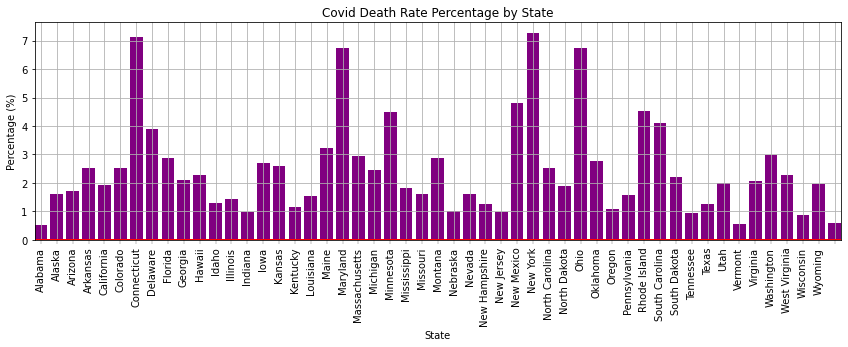

In [65]:

#x_axis = state amount

x_axis = np.arange(len(graph_df))

tick_mark = [tick for tick in x_axis]

plt.xticks(tick_mark, ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
                       'Connecticut', 'Delaware', 'Florida', 
                       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 
                       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
                       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
                       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
                       'Oklahoma', 'Oregon', 'Pennsylvania','Rhode Island', 'South Carolina', 
                       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 
                       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], rotation = 'vertical')




plt.bar(x_axis, final_percentage, color="purple")

plt.tick_params(axis='x', which='major', labelsize=10, width=0.25)

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*55+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])

plt.title("Covid Death Rate Percentage by State")
plt.ylabel("Percentage (%)")
plt.xlabel("State")
plt.grid()

plt.axhline(us_average_line, color = 'red', linewidth=1)


plt.savefig("percentages_vs_states", dpi=300)